In [43]:
# importing libraries
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [44]:
# importing the dataset
df = pd.read_csv("Churn_Modelling.csv")

In [45]:
# sepeartion of data
X = df.iloc[:,3:-1].values
y = df.iloc[:,-1].values

In [46]:
# label encoding the "Gender" column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])

In [47]:
# one hot encoding the "Geography" column
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers = [('encoder' , OneHotEncoder() , [1])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [48]:
# split into Trainig and Testing dataset
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0 )

In [49]:
# feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [51]:
# initializing the ANN
# two types of ann sequential and graph based . Sequential means layer by layer in order 
ann = tf.keras.models.Sequential()

In [53]:
# adding the Input , First and Second Hidden layer and the Output layer 
#from an object of the dense class a new layer comes 
ann.add(tf.keras.layers.Dense(units = 6 , activation = 'relu')) # input and first hidden layer
ann.add(tf.keras.layers.Dense(units = 6 , activation = 'relu')) # second hidden layer
ann.add(tf.keras.layers.Dense(units = 1 , activation = 'sigmoid')) # output layer 
#sigmoid gives probability as well an added benefit 

In [54]:
# compiling the ANN
ann.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [56]:
# training the ANN nand testing it
ann.fit(X_train , y_train , batch_size = 32 , epochs = 100)

Epoch 1/100
250/250 [==============================] - 0s 1ms/step - loss: 0.6094 - accuracy: 0.7180
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4669 - accuracy: 0.7960: 0s - loss: 0.4752 - accuracy: 0.
Epoch 3/100
250/250 [==============================] - 0s 960us/step - loss: 0.4340 - accuracy: 0.7976
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4087 - accuracy: 0.8106
Epoch 5/100
250/250 [==============================] - 0s 924us/step - loss: 0.3865 - accuracy: 0.8171
Epoch 6/100
250/250 [==============================] - 0s 963us/step - loss: 0.3745 - accuracy: 0.8295
Epoch 7/100
250/250 [==============================] - 0s 934us/step - loss: 0.3674 - accuracy: 0.8466
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3627 - accuracy: 0.8509
Epoch 9/100
250/250 [==============================] - 0s 892us/step - loss: 0.3585 - accuracy: 0.8512
Epoch 10/100
250/250 [=========================

250/250 [==============================] - 0s 895us/step - loss: 0.3308 - accuracy: 0.8630
Epoch 80/100
250/250 [==============================] - 0s 839us/step - loss: 0.3308 - accuracy: 0.8634
Epoch 81/100
250/250 [==============================] - 0s 884us/step - loss: 0.3308 - accuracy: 0.8626
Epoch 82/100
250/250 [==============================] - 0s 838us/step - loss: 0.3308 - accuracy: 0.8639
Epoch 83/100
250/250 [==============================] - 0s 875us/step - loss: 0.3305 - accuracy: 0.8637
Epoch 84/100
250/250 [==============================] - 0s 847us/step - loss: 0.3305 - accuracy: 0.8626
Epoch 85/100
250/250 [==============================] - 0s 898us/step - loss: 0.3299 - accuracy: 0.8625
Epoch 86/100
250/250 [==============================] - 0s 895us/step - loss: 0.3308 - accuracy: 0.8631
Epoch 87/100
250/250 [==============================] - 0s 867us/step - loss: 0.3310 - accuracy: 0.8644
Epoch 88/100
250/250 [==============================] - 0s 849us/step - loss:

In [58]:
#Use our ANN model to predict if the customer with the following informations will leave the bank:
#Geography: France
#Credit Score: 600
#Gender: Male
#Age: 40 years old
#Tenure: 3 years
#Balance: $60000
#Number of Products: 2
#Does this customer have a credit card ? Yes
#Is this customer an Active Member: Yes
#Estimated Salary: $50000
#So, should we say goodbye to that customer ?

print(ann.predict(ss.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]


In [59]:
# prediciting values
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


0.861

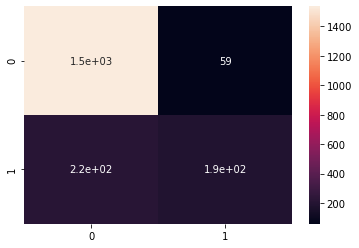

In [61]:
# confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot =True)
accuracy_score(y_test, y_pred)